In [11]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-3.5-turbo-0125",
  messages=[
    {
      "role": "user",
      "content": "Write a Python function that takes as input a file path to an image, loads the image into memory as a numpy array, then crops the rows and columns around the perimeter if they are darker than a threshold value. Use the mean value of rows and columns to decide if they should be marked for deletion."
    }
  ],
  temperature=0.7,
  top_p=1
)
print(response)

ChatCompletion(id='chatcmpl-9GFFWvAtwOHqRI0PKWXOkAmrfWkvo', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Here is a Python function that accomplishes the task described:\n\n```python\nimport cv2\nimport numpy as np\n\ndef crop_dark_perimeter(image_path, threshold=100):\n    # Load the image as a numpy array\n    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)\n\n    # Calculate the mean values of rows and columns\n    row_means = np.mean(image, axis=1)\n    col_means = np.mean(image, axis=0)\n\n    # Find the rows and columns to be cropped based on the threshold value\n    rows_to_crop = np.where(row_means < threshold)[0]\n    cols_to_crop = np.where(col_means < threshold)[0]\n\n    # Crop the image\n    cropped_image = image[rows_to_crop[-1]:rows_to_crop[0], cols_to_crop[-1]:cols_to_crop[0]]\n\n    return cropped_image\n\n# Example usage\nimage_path = "example.jpg"\ncropped_image = crop_dark_perimeter(image_path, threshold=10

In [12]:
print(response.choices[0].message.content)

Here is a Python function that accomplishes the task described:

```python
import cv2
import numpy as np

def crop_dark_perimeter(image_path, threshold=100):
    # Load the image as a numpy array
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the mean values of rows and columns
    row_means = np.mean(image, axis=1)
    col_means = np.mean(image, axis=0)

    # Find the rows and columns to be cropped based on the threshold value
    rows_to_crop = np.where(row_means < threshold)[0]
    cols_to_crop = np.where(col_means < threshold)[0]

    # Crop the image
    cropped_image = image[rows_to_crop[-1]:rows_to_crop[0], cols_to_crop[-1]:cols_to_crop[0]]

    return cropped_image

# Example usage
image_path = "example.jpg"
cropped_image = crop_dark_perimeter(image_path, threshold=100)
```

This function loads the image from the specified file path, calculates the mean values of rows and columns, identifies rows and columns that are darker than the threshold value, 

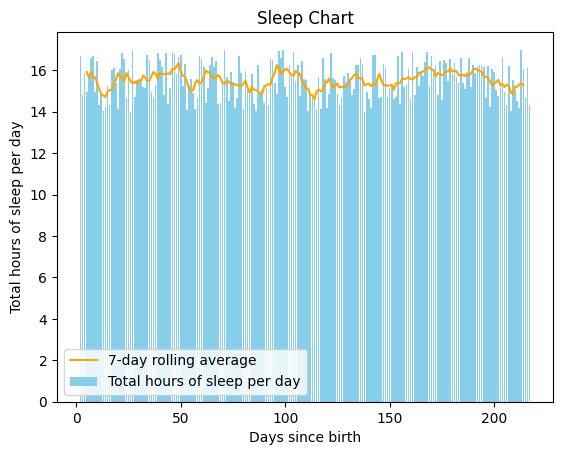

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def create_sleep_chart(x_values, y_values):
    # Create the bar chart
    plt.bar(x_values, y_values, label='Total hours of sleep per day', color='skyblue')

    # Calculate the rolling average
    rolling_avg = np.convolve(y_values, np.ones(7)/7, mode='valid')
    plt.plot(x_values[3:-3], rolling_avg, color='orange', label='7-day rolling average')

    # Set labels and title
    plt.xlabel('Days since birth')
    plt.ylabel('Total hours of sleep per day')
    plt.title('Sleep Chart')

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

# Example usage
x_values = np.arange(2, 218)
y_values = np.random.uniform(14, 17, size=216)  # Generating random float values between 14 and 17
create_sleep_chart(x_values, y_values)

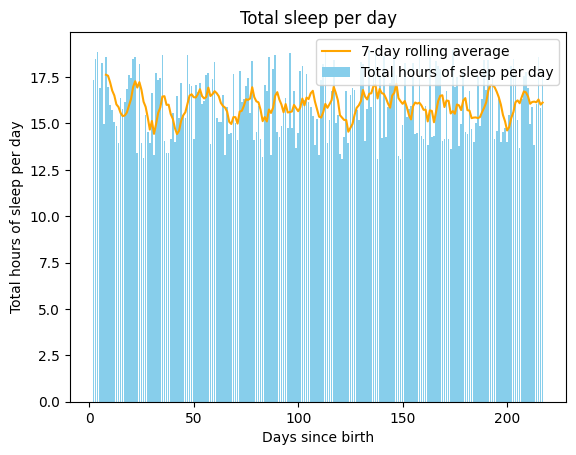

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_sleep_chart(df):
    x_values = df['x'].values
    y_values = df['y'].values

    # Create the bar chart
    plt.bar(x_values, y_values, label='Total hours of sleep per day', color='skyblue')

    # Calculate the rolling average
    rolling_avg = df['y'].rolling(window=7).mean()
    plt.plot(x_values, rolling_avg, color='orange', label='7-day rolling average')

    # Set labels and title
    plt.xlabel('Days since birth')
    plt.ylabel('Total hours of sleep per day')
    plt.title('Total sleep per day')

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

# Example usage
data = {'x': np.arange(2, 218), 'y': np.random.uniform(13, 19, size=216)}
df = pd.DataFrame(data)
create_sleep_chart(df)

In [7]:
ember_sleep_df = pd.read_csv('data/ember_sleep_30march_updated.csv')
ember_sleep_df['sleep_date'] = pd.to_datetime(ember_sleep_df['sleep_date'])
fixed_date = pd.to_datetime('2023-08-18')
ember_sleep_df['months_between'] = (fixed_date.year - ember_sleep_df['sleep_date'].dt.year) * 12 + (fixed_date.month - ember_sleep_df['sleep_date'].dt.month)

C:\Users\lets_\AppData\Local\Temp\ipykernel_53448\836765508.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

